In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X, y = data["data"], data["target"]
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [2]:
X.shape

(150, 4)

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

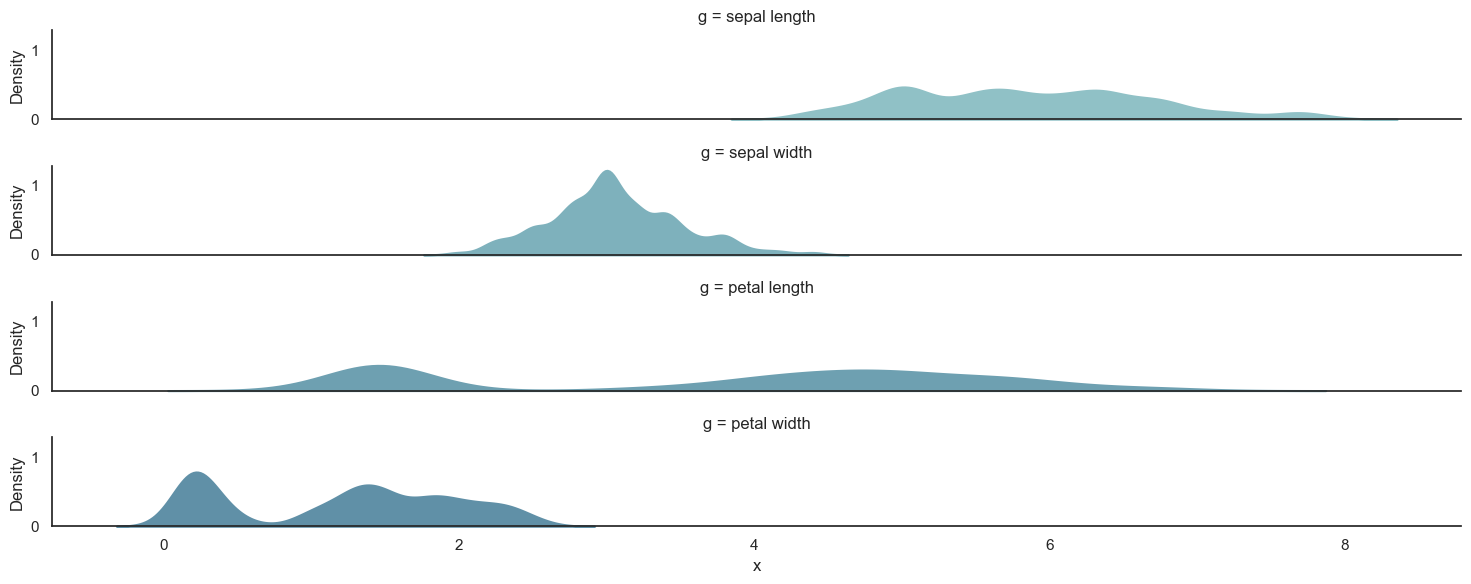

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0,0, 0)})

x = X.ravel()
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, len(X))
df = pd.DataFrame(dict(x=x, g=g))

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

g.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)

In [5]:
len(x)

600

In [7]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)
X_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

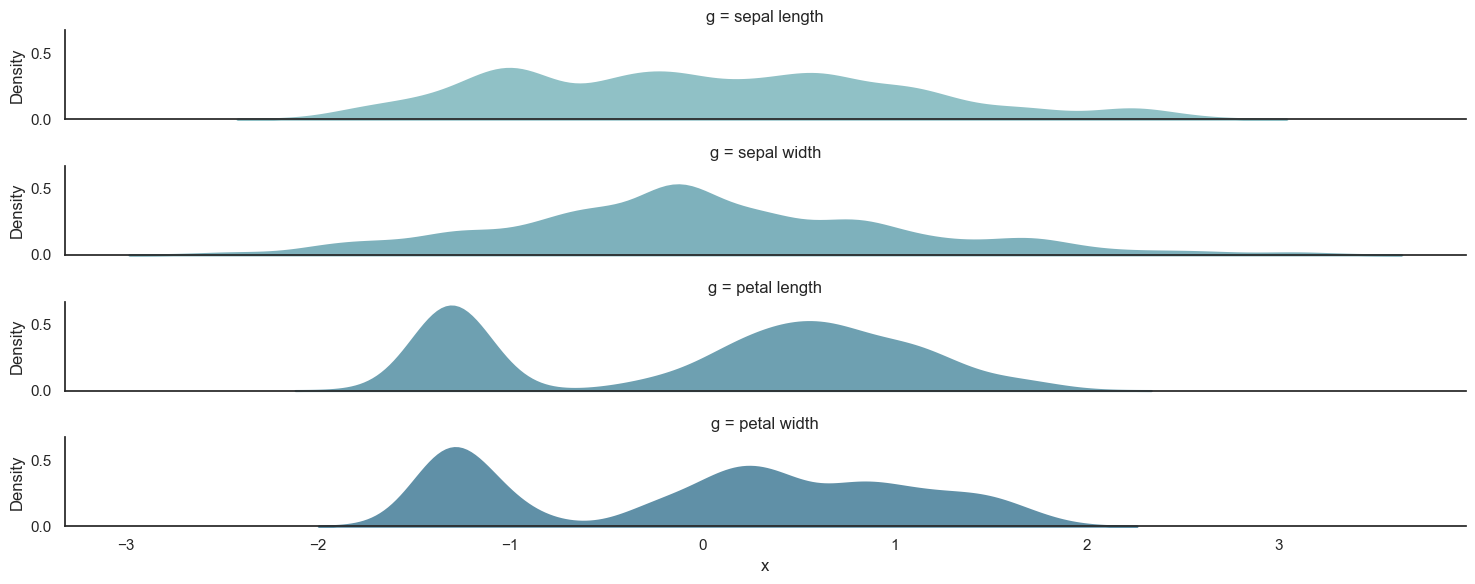

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0,0, 0)})

x = X_scaled.ravel()
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, len(X_scaled))
df = pd.DataFrame(dict(x=x, g=g))

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

g.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)

In [1]:
from timeit import timeit


n_runs = 100000
size = 1000


t_add_builtin = timeit(
    "[x + y for x, y in zip(v_1, v_2)]",
    setup=f"size={size}; v_1 = [0 for _ in range(size)]; v_2 = [0 for _ in range(size)]",
    number=n_runs
)

t_add_numpy = timeit(
    "v_1 + v_2",
    setup=f"import numpy as np; size={size}; v_1 = np.zeros(shape=size); v_2 = np.zeros(shape=size)",
    number=n_runs
)


print(f"Built-in addition:       \t{t_add_builtin} s")
print(f"NumPy addition:          \t{t_add_numpy} s")
print(f"Performance improvement: \t{t_add_builtin/t_add_numpy:.3f} times faster")

Built-in addition:       	2.2174540001433343 s
NumPy addition:          	0.05529240006580949 s
Performance improvement: 	40.104 times faster


In [3]:
sizes = list(range(1, 100))

runtime_builtin = [
    timeit(
        "[random_py() for _ in range(size)]",
        setup=f"from random import random as random_py; size={size}",
        number=100000
    )
    for size in sizes
]

runtime_numpy = [
    timeit(
        "random_np(size)",
        setup=f"from numpy.random import random as random_np;size={size}",
        number=100000
    )
    for size in sizes
]

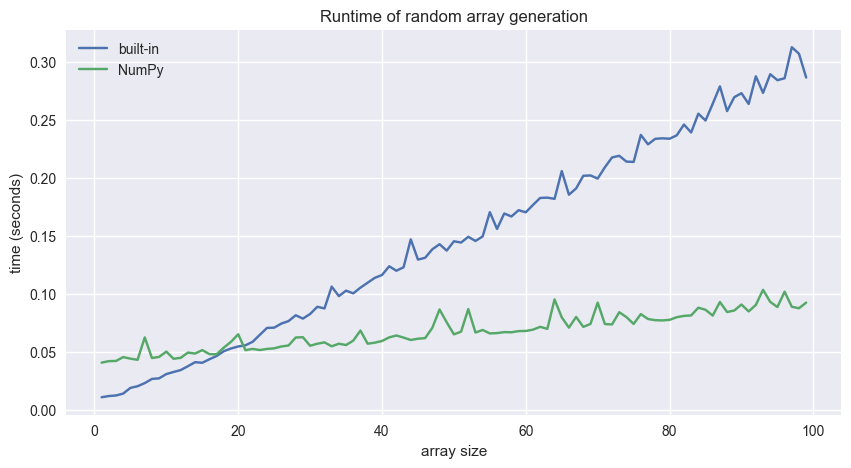

In [4]:
import matplotlib.pyplot as plt

with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(10,5))
    plt.plot(sizes, runtime_builtin, label="built-in")
    plt.plot(sizes, runtime_numpy, label="NumPy")
    plt.xlabel("array size")
    plt.ylabel("time (seconds)")
    plt.title("Runtime of random array generation")
    plt.legend()
    plt.show()